# Assignment #3

In [178]:
# 1.0 First import numpy and matplotlib (added pandas)
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [179]:
# 1.1 Create two 2D arrays representing x/y coordinates on a cartesian plane
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
print(x.shape)
print(y.shape)
xx, yy = np.meshgrid(x, y)
print(xx.shape)
print(yy.shape)

(100,)
(100,)
(100, 100)
(100, 100)


Text(0, 0.5, 'Y-coordinates')

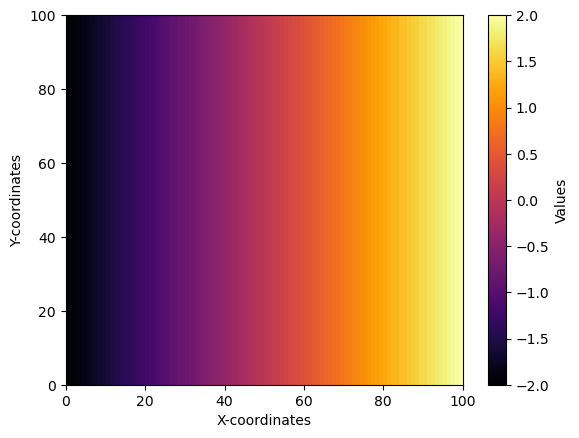

In [180]:
# 1.2 Visualise each 2D array use pcolormesh
plt.pcolormesh(xx, cmap = 'inferno', vmin = -2, vmax = 2)
plt.colorbar(label = "Values")
plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")

Text(0, 0.5, 'Y-coordinates')

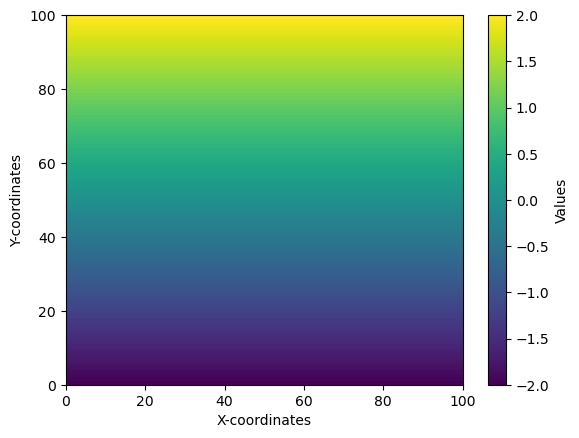

In [181]:
plt.pcolormesh(yy, cmap = 'viridis', vmin = -2, vmax = 2)
plt.colorbar(label = "Values")
plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")

In [182]:
# 1.3 From your cartesian coordinates, create polar coordinates 'r' and 'φ'

rad = np.sqrt(np.power(yy, 2) + np.power(xx, 2))
phi = np.arctan2(yy, xx)

Text(0, 0.5, 'Y-Values')

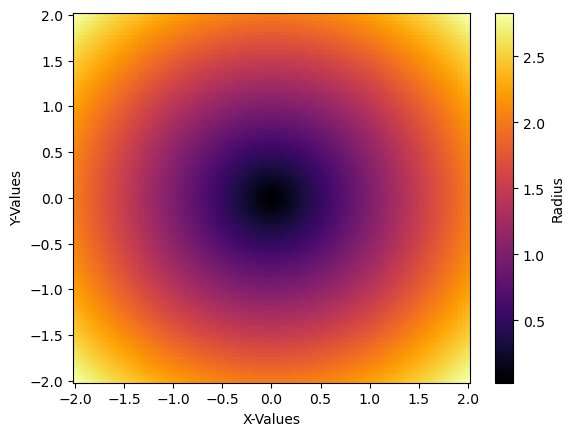

In [183]:
# 1.4 Visualize 'r' and 'φ' on the 2D x/y plane using pcolormesh
plt.pcolormesh(xx, yy, rad, cmap = 'inferno')
plt.colorbar(label = "Radius")
plt.xlabel("X-Values")
plt.ylabel("Y-Values")

Text(0, 0.5, 'Y-Values')

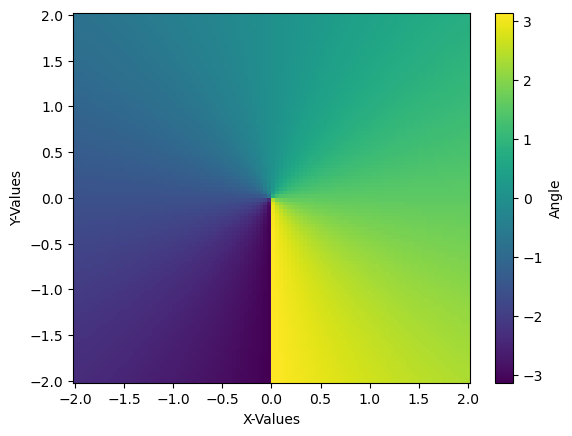

In [184]:
plt.pcolormesh(yy, xx, phi, cmap = 'viridis')
plt.colorbar(label = "Angle")
plt.xlabel("X-Values")
plt.ylabel("Y-Values")

Text(0, 0.5, 'Y-Values')

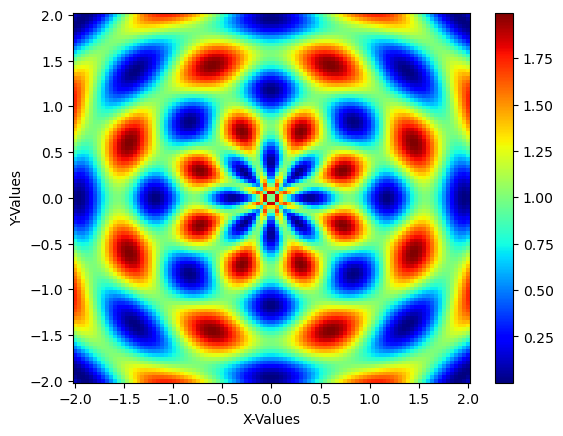

In [185]:
# 1.5 Calculate the quantity of f = cos^2(4r) + sin^2(4φ) and plot it on the x/y plane
f = np.power(np.cos(4*rad), 2) + np.power(np.sin(4*phi), 2)
plt.pcolormesh(xx, yy, f, cmap = 'jet')
plt.colorbar()
plt.xlabel("X-Values")
plt.ylabel("Y-Values")

Text(0, 0.5, "Mean of 'f' with respect to x")

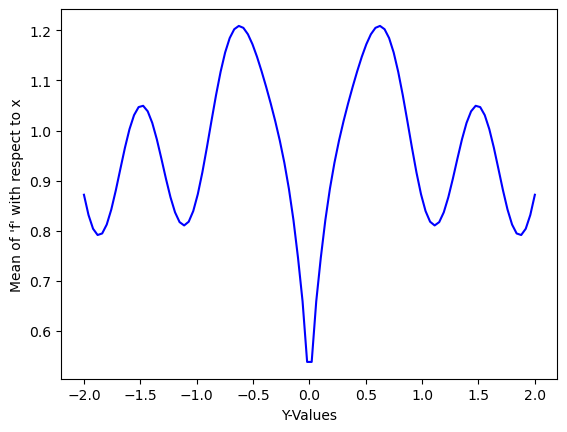

In [186]:
# 1.6 Plot the mean with respect to the x-axis as a function of y
fmeanx = np.mean(f, axis = 1)
plt.plot(yy[:,0], fmeanx, color = "blue")
plt.xlabel("Y-Values")
plt.ylabel("Mean of 'f' with respect to x")

Text(0, 0.5, "Mean of 'f' with respect to y")

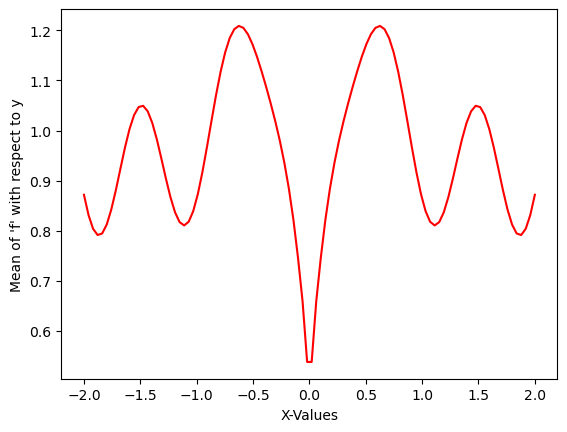

In [187]:
# 1.7 Plot the mean with respect to the y-axis as a function of x
fmeany = np.mean(f, axis = 0)
plt.plot(xx[0,:], fmeany, color = "red")
plt.xlabel("X-Values")
plt.ylabel("Mean of 'f' with respect to y")

In [188]:
# 2.0 Analyze ARGO Data
# In this problem, we use real data from ocean profiling floats. 
# ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. 
# ARGO floats collect one “profile” (a set of messurements at different depths or “levels”).
# Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.
# First, you can access the data files we need for this exercise here on chopin: /data9/UN3400/data/float_data_assign3.zip
# Copy this file over to your work space /data9/UN3400/work/your_uni where "your_uni" is your UNI.
# Be sure to use "cp" to copy and not "mv" which will delete the original. 

print("Done")

Done


In [189]:
# 2.1 Load each data file as a numpy array.
T = np.load("/data9/UN3400/work/ms6650/float_data/T.npy")
S = np.load("/data9/UN3400/work/ms6650/float_data/S.npy")
P = np.load("/data9/UN3400/work/ms6650/float_data/P.npy")
date = np.load("/data9/UN3400/work/ms6650/float_data/date.npy")
lat = np.load("/data9/UN3400/work/ms6650/float_data/lat.npy")
lon = np.load("/data9/UN3400/work/ms6650/float_data/lon.npy")
lvl = np.load("/data9/UN3400/work/ms6650/float_data/levels.npy")

In [190]:
# 2.2 Examine the shapes of T, S, and P compared to date, lat, lon, and lvl. How do you think they are 
# related? Based on the shapes, which dimensions do you think are shared among the arrays?
print(T.shape, S.shape, P.shape)
print(date.shape, lat.shape, lon.shape, lvl.shape)
print("")
print("It seems like each entry for T, S, and P is taken for an individual float at a certain latitude/longitude,"
      " on a certain date, and then each float has measurements taken at different depth intervals which are denoted"
      " by the date. So the x-values for T, S, and P line up with the levels and the y-values line up with the date,"
      " lat, and lon.")
print("")
print("After trying to do 2.5, I found that I kept getting incorrect plots. Seems like three columns from each of T/S/P had NaN values and needed to be trimmed.")

(78, 75) (78, 75) (78, 75)
(75,) (75,) (75,) (78,)

It seems like each entry for T, S, and P is taken for an individual float at a certain latitude/longitude, on a certain date, and then each float has measurements taken at different depth intervals which are denoted by the date. So the x-values for T, S, and P line up with the levels and the y-values line up with the date, lat, and lon.

After trying to do 2.5, I found that I kept getting incorrect plots. Seems like three columns from each of T/S/P had NaN values and needed to be trimmed.


Text(0.5, 1.0, 'Pressure at Depth')

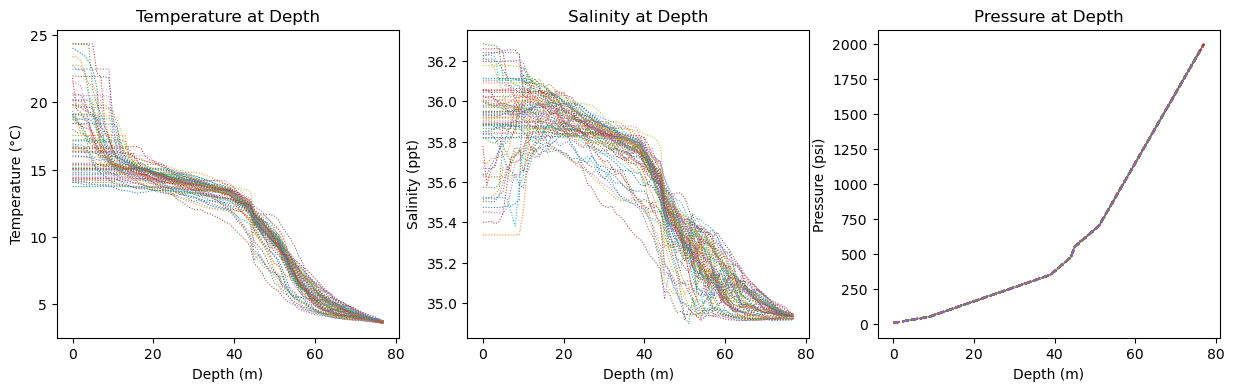

In [191]:
# 2.3 Make a plot for each column of data in T, S and P (three plots).
# The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.
fig = plt.figure(figsize=(15,4))
axis = fig.subplots(nrows=1, ncols=3)
axis[0].plot(lvl, T, linestyle=':', linewidth=0.75)
axis[0].set_xlabel('Depth (m)')
axis[0].set_ylabel('Temperature (°C)')
axis[0].set_title('Temperature at Depth')

axis[1].plot(lvl, S, linestyle=':', linewidth=0.75)
axis[1].set_xlabel('Depth (m)')
axis[1].set_ylabel('Salinity (ppt)')
axis[1].set_title('Salinity at Depth')

axis[2].plot(lvl, P, linestyle='--', linewidth=1.25)
axis[2].set_xlabel('Depth (m)')
axis[2].set_ylabel('Pressure (psi)')
axis[2].set_title('Pressure at Depth')

In [192]:
# 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.
lvl_clean = np.delete(lvl, [25, 37, 52])
Tval = ~np.any(np.isnan(T), axis = 1)
Sval = ~np.any(np.isnan(S), axis = 1)
Pval = ~np.any(np.isnan(P), axis = 1)
Tclean = T[Tval, :]
Sclean = S[Sval, :]
Pclean = P[Pval, :]
meanT = np.mean(Tclean, axis = 0)
meanS = np.mean(Sclean, axis = 0)
meanP = np.mean(Pclean, axis = 0)
stdT = np.std(meanT, axis = 0)
stdS = np.std(meanS, axis = 0)
stdP = np.std(meanP, axis = 0)

<ErrorbarContainer object of 3 artists>

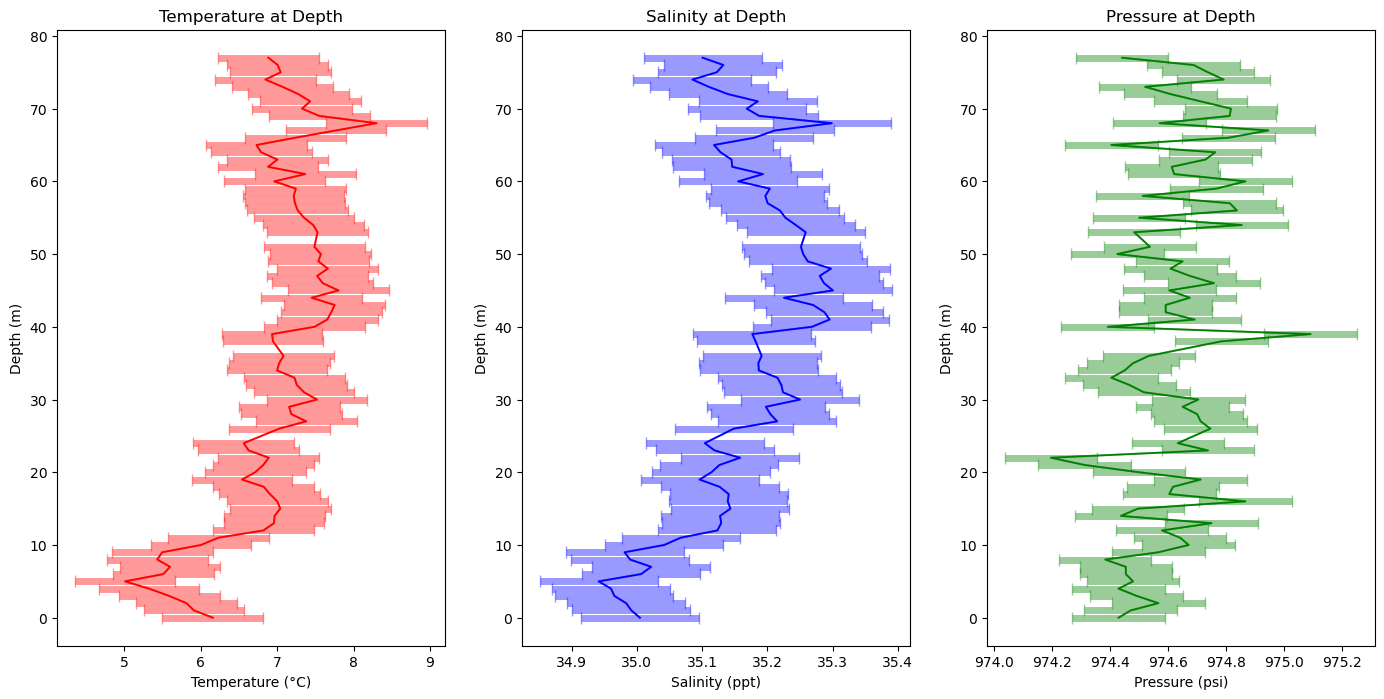

In [193]:
# 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.
fig = plt.figure(figsize=(17,8))
axis = fig.subplots(nrows=1, ncols=3)

axis[0].plot(meanT, lvl_clean, color = 'r', linestyle='-', linewidth=1.25)
axis[0].set_ylabel('Depth (m)')
axis[0].set_xlabel('Temperature (°C)')
axis[0].set_title('Temperature at Depth')
axis[0].errorbar(meanT, lvl_clean, xerr = stdT, alpha=0.4, color ='r', elinewidth=5, capsize=4)

axis[1].plot(meanS, lvl_clean, color = 'b', linestyle='-', linewidth=1.25)
axis[1].set_ylabel('Depth (m)')
axis[1].set_xlabel('Salinity (ppt)')
axis[1].set_title('Salinity at Depth')
axis[1].errorbar(meanS, lvl_clean, xerr = stdS, alpha=0.4, color ='b', elinewidth=5, capsize=4)

axis[2].plot(meanP, lvl_clean, color = 'g', linestyle='-', linewidth=1.25)
axis[2].set_ylabel('Depth (m)')
axis[2].set_xlabel('Pressure (psi)')
axis[2].set_title('Pressure at Depth')
axis[2].errorbar(meanP, lvl_clean, xerr = stdP, alpha=0.4, color ='g', elinewidth=5, capsize=4)

In [194]:
# 2.6 Account For Missing Data
print("Oops. Looks like I got ahead of myself earlier.")

Oops. Looks like I got ahead of myself earlier.


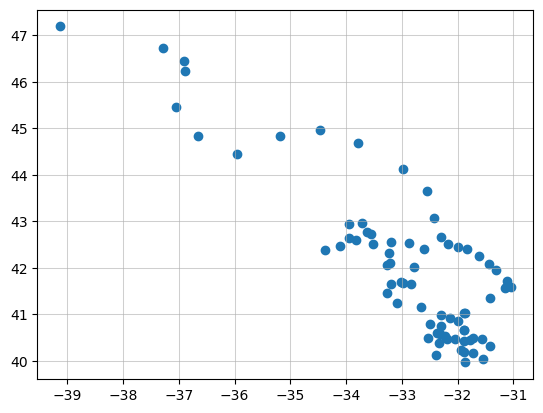

In [196]:
# 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.
plt.scatter(lon, lat)
plt.grid(which='major', linewidth=0.75, alpha=0.6)
# plt.set_xlabel('Longitude')
# plt.set_ylabel('Latitude')